In [7]:
from matplotlib import pyplot as plt
import numpy as np

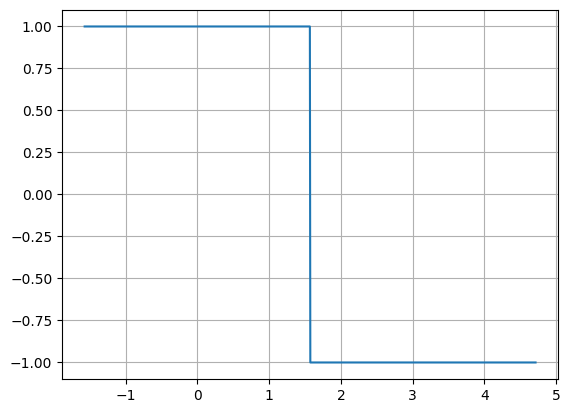

In [13]:
t = np.linspace(-1/2*np.pi, 3/2*np.pi,1000)
def f(t):
    return np.where((t >= -1/2*np.pi) & (t <= 1/2*np.pi),1,-1)

plt.plot(t,f(t))
plt.grid()
plt.show()

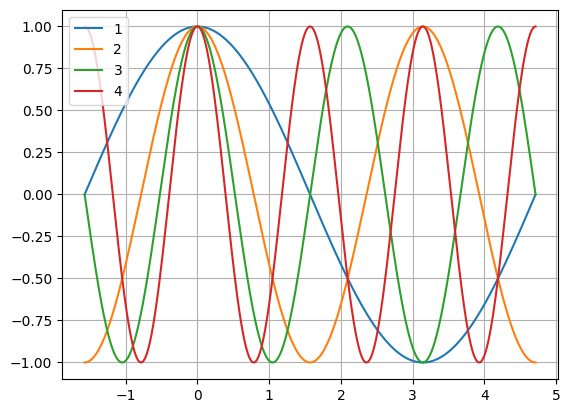

In [19]:
for freq in [1,2,3,4]:
    plt.plot(t,np.cos(freq*t),label=f'{freq}')
plt.grid()
plt.legend()
plt.show()

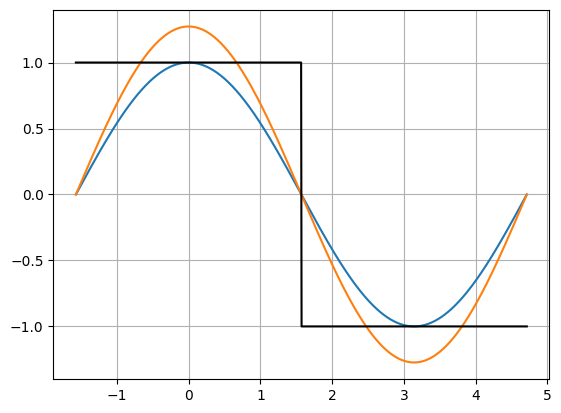

In [23]:
plt.plot(t,np.cos(t))
plt.plot(t,4/np.pi*np.cos(t))
plt.plot(t,f(t),'k')
plt.grid()
plt.show()

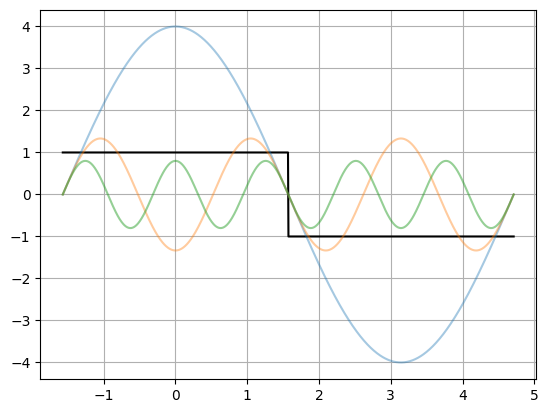

In [34]:
a1 = 4/np.pi; a2 = 0; a3 = -4/(3*np.pi); a4 = 0; a5 = 4*1/(5*np.pi)
plt.plot(t,f(t),'k')
plt.plot(t,a1*np.pi*np.cos(t),alpha=0.4)
# plt.plot(t,a2*np.pi*np.cos(2*t),alpha=0.5)
plt.plot(t,a3*np.pi*np.cos(3*t),alpha=0.4)
# plt.plot(t,a4*np.pi*np.cos(4*t),alpha=0.5)
plt.plot(t,a5*np.pi*np.cos(5*t),alpha=0.5)
plt.grid()
plt.show()

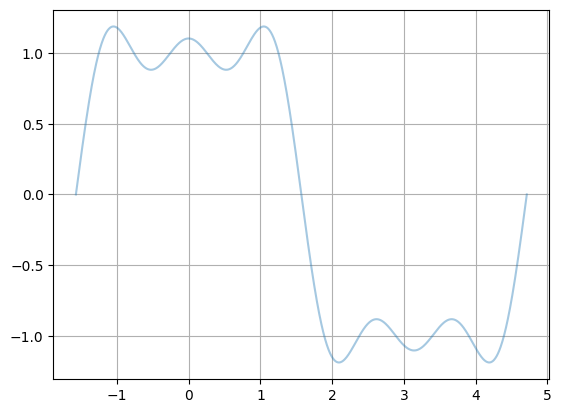

In [47]:
fourier5 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t) + a4*np.cos(4*t) + a5*np.cos(5*t)
plt.plot(t,fourier5(t),alpha=0.4)
plt.grid()
plt.show()

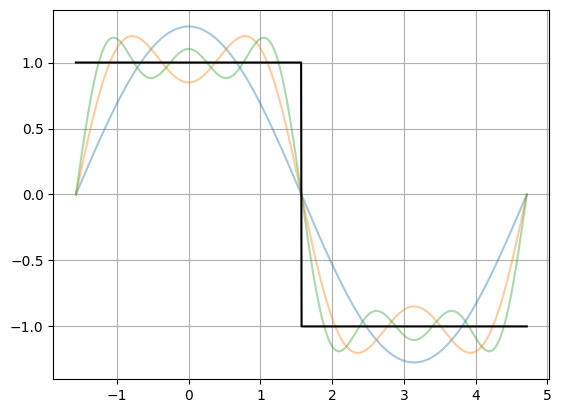

In [45]:
fourier1 = lambda t: a1*np.cos(1*t)
fourier2 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t)
fourier3 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t)
fourier4 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t) + a4*np.cos(4*t)
fourier5 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t) + a4*np.cos(4*t) + a5*np.cos(5*t)
plt.plot(t,fourier1(t),alpha=0.4)
# plt.plot(t,fourier2(t),alpha=0.4)
plt.plot(t,fourier3(t),alpha=0.4)
# plt.plot(t,fourier4(t),alpha=0.4)
plt.plot(t,fourier5(t),alpha=0.4)
plt.plot(t,f(t),'k')
plt.grid()
plt.show()